In [1]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
%matplotlib inline

In [2]:
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

In [3]:
raft_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\raft_outdoor\\raft_5-nodes_2-fails\\data.csv", sep=",")

In [4]:
raft_data_5_nodes[raft_data_5_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,20,175,43,21
3,1,2,21,199,43,21
4,2,1,20,231,42,21
...,...,...,...,...,...,...
3770,3,999,21,146,37,23
3771,4,999,22,57,31,24
3772,5,999,21,127,31,25
3773,3,1000,20,130,37,23


In [5]:
paxos_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\paxos_outdoor\\paxos_5-nodes_2-fails\\data.csv", sep=",")

In [6]:
noalg_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\control_outdoor\\outdoor_control_5-nodes_2-fails\\data.csv", error_bad_lines=False, sep=",")

In [7]:
raft_data_5_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3775 entries, 0 to 3774
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodeName      3775 non-null   object
 1   packetNumber  3762 non-null   object
 2   temperature   3762 non-null   object
 3   brightness    3762 non-null   object
 4   humidity      3756 non-null   object
 5   onBoardTemp   3747 non-null   object
dtypes: object(6)
memory usage: 177.1+ KB


In [8]:
raft_data_5_nodes.shape

(3775, 6)

In [9]:
paxos_data_5_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      3673 non-null   object 
 1   packetNumber  3667 non-null   object 
 2   temperature   3667 non-null   float64
 3   brightness    3667 non-null   object 
 4   humidity      3667 non-null   object 
 5   onBoardTemp   3663 non-null   object 
dtypes: float64(1), object(5)
memory usage: 172.3+ KB


In [10]:
paxos_data_5_nodes.shape

(3673, 6)

In [11]:
noalg_data_5_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodeName      2139 non-null   object
 1   packetNumber  2138 non-null   object
 2   temperature   2117 non-null   object
 3   brightness    2092 non-null   object
 4   humidity      2057 non-null   object
 5   onBoardTemp   2034 non-null   object
dtypes: object(6)
memory usage: 100.4+ KB


In [12]:
noalg_data_5_nodes.shape

(2140, 6)

In [13]:
#RAFT

In [14]:
raft_data_5_nodes[raft_data_5_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,20,175,43,21
3,1,2,21,199,43,21
4,2,1,20,231,42,21
...,...,...,...,...,...,...
3770,3,999,21,146,37,23
3771,4,999,22,57,31,24
3772,5,999,21,127,31,25
3773,3,1000,20,130,37,23


In [15]:
raft_data_5_nodes_clean = raft_data_5_nodes.dropna()

In [16]:
raft_data_5_nodes_clean.shape

(3747, 6)

In [17]:
raft_data_5_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\raft_data_5_nodes_2_clean.csv', index = False, header=True)

In [18]:
#manual cleaning of the csv req

In [17]:
clean_raft_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\raft_data_5_nodes_2_clean.csv", sep=",")

In [18]:
clean_raft_data_5 = clean_raft_data_5_nodes.dropna()

In [19]:
final_clean_raft_5 = clean_raft_data_5.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [20]:
final_clean_raft_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3742 entries, 0 to 3746
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   nodeName      3742 non-null   int64
 1   packetNumber  3742 non-null   int64
 2   temperature   3742 non-null   int64
 3   brightness    3742 non-null   int64
 4   humidity      3742 non-null   int64
 5   onBoardTemp   3742 non-null   int64
dtypes: int64(6)
memory usage: 204.6 KB


In [21]:
final_clean_raft_5.shape

(3742, 6)

In [22]:
#PAXOS

In [23]:
paxos_data_5_nodes[paxos_data_5_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,21.0,118,44,23
3,1,2,21.0,117,44,23
4,1,3,22.0,227,44,23
...,...,...,...,...,...,...
3668,3,1000,20.0,101,42,23
3669,4,998,21.0,58,33,24
3670,4,999,21.0,63,33,24
3671,4,1000,21.0,58,33,24


In [24]:
paxos_data_5_nodes_clean = paxos_data_5_nodes.dropna()

In [25]:
paxos_data_5_nodes_clean.shape

(3663, 6)

In [25]:
paxos_data_5_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\paxos_data_5_nodes_2_clean.csv', index = False, header=True)

In [26]:
#manual cleaning of the csv req

In [26]:
clean_paxos_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\paxos_data_5_nodes_2_clean.csv", sep=",")

In [27]:
clean_paxos_data_5_nodes.shape

(3663, 6)

In [28]:
clean_paxos_data_5 = clean_paxos_data_5_nodes.dropna()

In [29]:
clean_paxos_data_5.shape

(3655, 6)

In [30]:
final_clean_paxos_5 = clean_paxos_data_5.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [31]:
#NO ALG

In [32]:
noalg_data_5_nodes[noalg_data_5_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,1,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2135,5,996,21,668,35,25
2136,5,997,21,534,35,25
2137,5,998,22,531,35,25
2138,5,999,21,668,35,25


In [33]:
noalg_data_5_nodes_clean = noalg_data_5_nodes.dropna()

In [34]:
noalg_data_5_nodes_clean.shape

(2031, 6)

In [35]:
noalg_data_5_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\noalg_data_5_nodes_2_clean.csv', index = False, header=True)

In [37]:
#manual cleaning of the csv req

In [51]:
clean_noalg_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\noalg_data_5_nodes_2_clean.csv", sep=",")

In [52]:
clean_noalg_data_5_nodes.shape

(2031, 6)

In [53]:
clean_noalg_data_5 = clean_noalg_data_5_nodes.dropna()

In [54]:
clean_noalg_data_5.shape

(1996, 6)

In [55]:
final_clean_noalg_5 = clean_noalg_data_5.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [56]:
df = {'algorithm': ['RAFT', 'Paxos', 'NoAlgorithm'], 
               'goodPacketsReceived': [len(final_clean_raft_5), len(final_clean_paxos_5), len(final_clean_noalg_5)], 
               'totalPacketsReceived': [len(raft_data_5_nodes), len(paxos_data_5_nodes), len(noalg_data_5_nodes)], 
               'packetsExpected': [3800, 3800, 3800]}

all_5_nodes = pd.DataFrame(df)

In [57]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.rcParams['font.family'] = "serif"

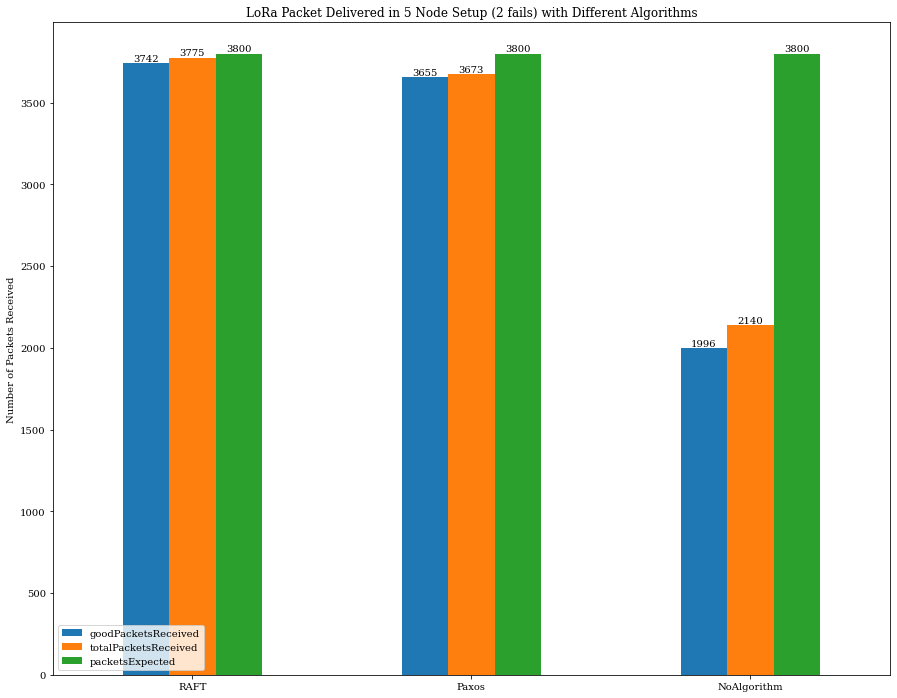

In [58]:
ax = all_5_nodes.plot.bar(x='algorithm')
plt.title('LoRa Packet Delivered in 5 Node Setup (2 fails) with Different Algorithms')
ax.set(xlabel='', ylabel='Number of Packets Received')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='lower left')
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\5_nodes_2.png', bbox_inches='tight')

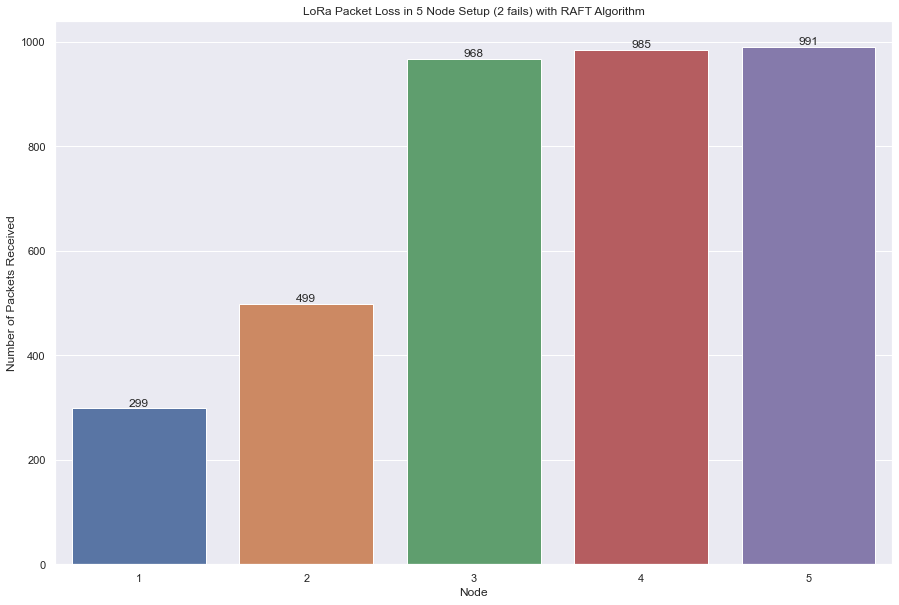

In [68]:
#LoRa Packet Loss in 5 Node Setup (2 fails) with RAFT Algorithm
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_raft_5)
plt.title('LoRa Packet Loss in 5 Node Setup (2 fails) with RAFT Algorithm')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\5_nodes_2_RAFT.png', bbox_inches='tight')

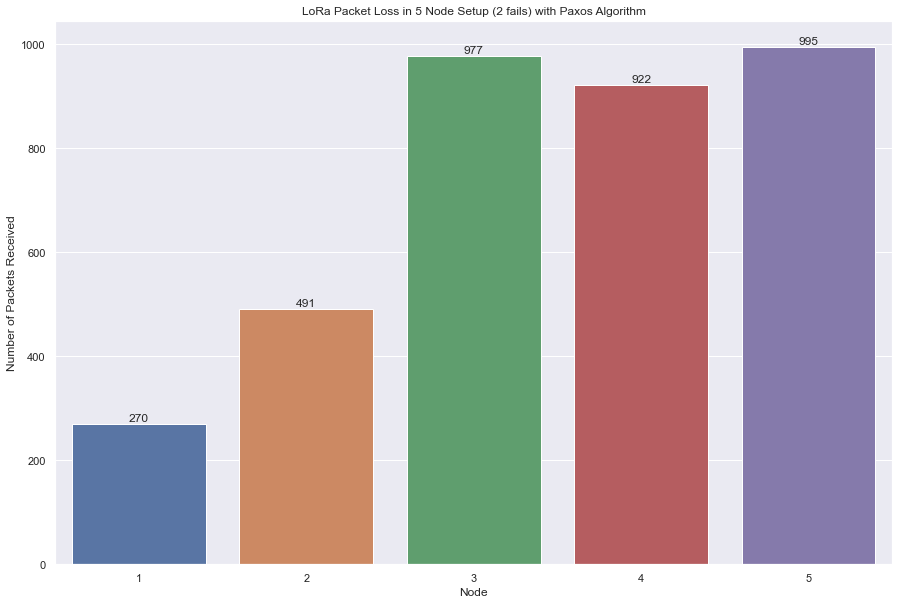

In [69]:
#LoRa Packet Loss in 5 Node Setup (2 fails) with Paxos Algorithm
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_paxos_5)
plt.title('LoRa Packet Loss in 5 Node Setup (2 fails) with Paxos Algorithm')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\5_nodes_2_Paxos.png', bbox_inches='tight')

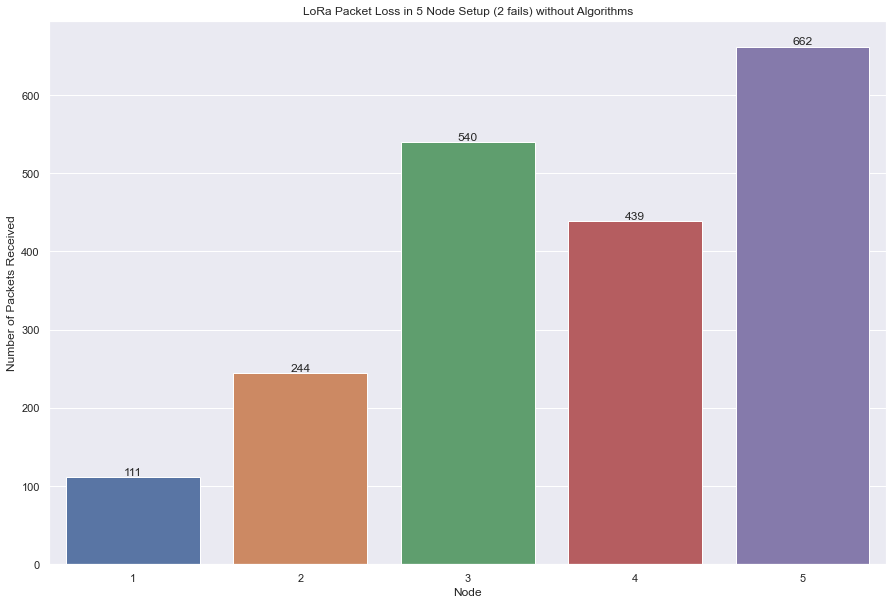

In [59]:
#LoRa Packet Loss in 5 Node Setup (2 fails) without Algorithms
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_noalg_5)
plt.title('LoRa Packet Loss in 5 Node Setup (2 fails) without Algorithms')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\5_nodes_2_noAlg_outdoor.png', bbox_inches='tight')

In [60]:
#no alg indoor

In [61]:
indoor_noalg_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\control\\5_control_5-nodes_2-failures\\data.csv", error_bad_lines=False, sep=",")

In [62]:
indoor_noalg_data_5_nodes[indoor_noalg_data_5_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,4,1,20.0,7.0,54.0,20
1,4,2,20.0,7.0,54.0,20
2,4,3,20.0,5.0,54.0,20
3,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7,20.0,6.0,54.0,20
...,...,...,...,...,...,...
2011,5,1000,28.0,73.0,37.0,26
2012,2,997,21.0,7.0,45.0,24
2013,2,998,21.0,8.0,45.0,24
2014,2,999,21.0,8.0,45.0,24


In [63]:
indoor_noalg_data_5_nodes_clean = indoor_noalg_data_5_nodes.dropna()

In [64]:
indoor_noalg_data_5_nodes_clean.shape

(2014, 6)

In [55]:
indoor_noalg_data_5_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\indoor_noalg_data_5_nodes_2_clean.csv', index = False, header=True)

In [56]:
#manual cleaning of the csv req

In [65]:
clean_indoor_noalg_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\indoor_noalg_data_5_nodes_2_clean.csv", sep=",")

In [66]:
clean_indoor_noalg_data_5_nodes.shape

(2014, 6)

In [67]:
clean_indoor_noalg_data_5 = clean_indoor_noalg_data_5_nodes.dropna()

In [68]:
clean_indoor_noalg_data_5.shape

(2011, 6)

In [69]:
final_indoor_clean_noalg_5 = clean_indoor_noalg_data_5.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [70]:
df1 = {'algorithm': ['RAFT', 'Paxos', 'NoAlgorithmOutdoor', 'NoAlgorithmIndoor'], 
               'goodPacketsReceived': [len(final_clean_raft_5), len(final_clean_paxos_5), len(final_clean_noalg_5),len(final_indoor_clean_noalg_5)], 
               'totalPacketsReceived': [len(raft_data_5_nodes), len(paxos_data_5_nodes), len(noalg_data_5_nodes),len(indoor_noalg_data_5_nodes)], 
               'packetsExpected': [3800, 3800, 3800,3800]}

all_5_nodes_indoor = pd.DataFrame(df1)

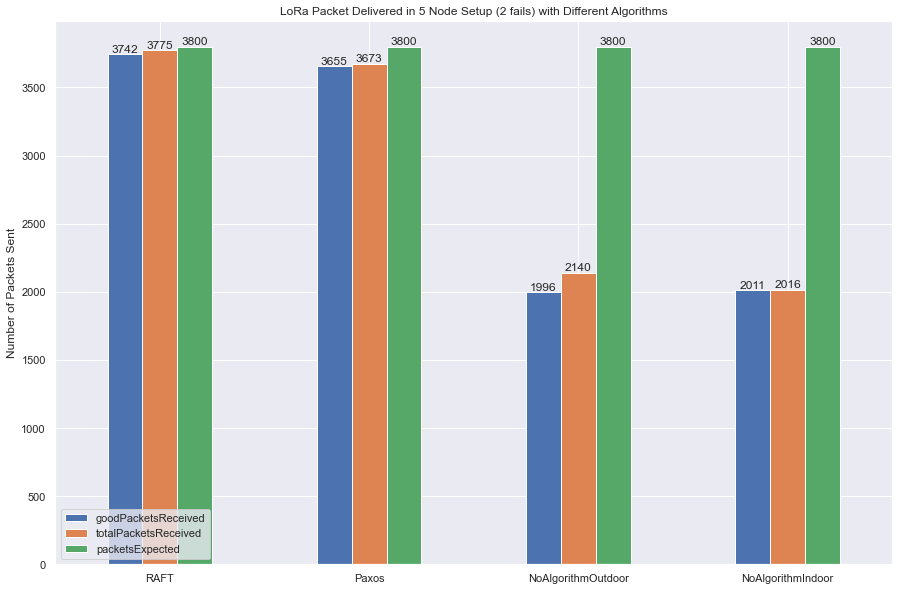

In [71]:
ax = all_5_nodes_indoor.plot.bar(x='algorithm')
plt.title('LoRa Packet Delivered in 5 Node Setup (2 fails) with Different Algorithms')
ax.set(xlabel='', ylabel='Number of Packets Sent')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='lower left')
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\5_nodes_2_indoor.png', bbox_inches='tight')

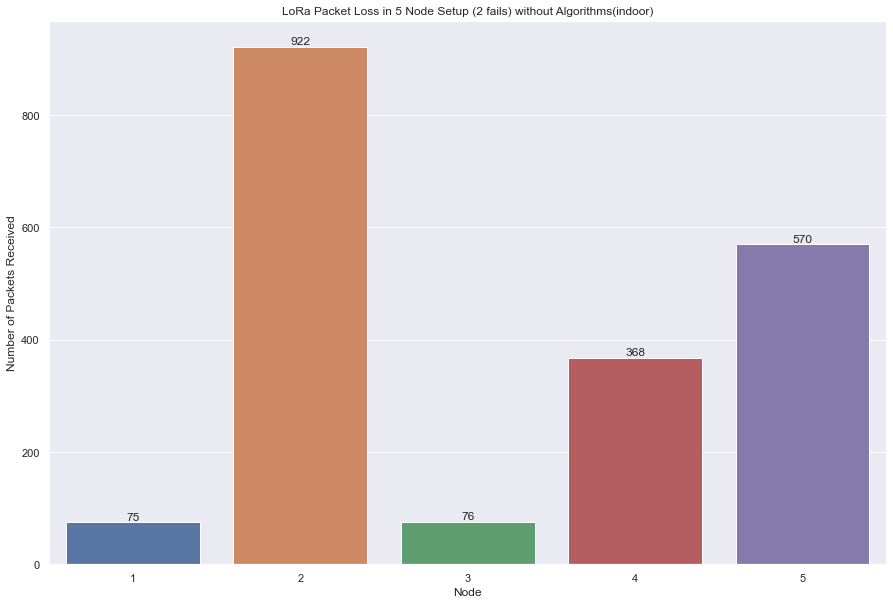

In [73]:
#LoRa Packet Loss in 5 Node Setup (no fails) without Algorithms INDOOR
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_indoor_clean_noalg_5)
plt.title('LoRa Packet Loss in 5 Node Setup (2 fails) without Algorithms(indoor)')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\5_nodes_2_noAlg_indoor.png', bbox_inches='tight')